In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tabulate import tabulate


# Inference:

This cell imports the necessary libraries for data manipulation, machine learning, evaluation, and visualization.

In [2]:
# Load data
data = pd.read_excel('measures.xlsx')

# Replace non-numeric placeholders with NaN
data.replace('-', np.nan, inplace=True)

# Convert all columns to numeric, errors='coerce' will convert non-convertible values to NaN
data.iloc[:, :4] = data.iloc[:, :4].apply(pd.to_numeric, errors='coerce')

# Rename the target column if necessary or ensure it's correctly named
if "Unnamed: 4" in data.columns:
    data.rename(columns={"Unnamed: 4": "Target"}, inplace=True)
if "Unnamed: 1" in data.columns:
    data.rename(columns={"Unnamed: 1": "Input 2"}, inplace=True)
if "Unnamed: 2" in data.columns:
    data.rename(columns={"Unnamed: 2": "Input 2"}, inplace=True)
if "Unnamed: 3" in data.columns:
    data.rename(columns={"Unnamed: 3": "Input 3"}, inplace=True)
if "Unnamed: 0" in data.columns:
    data.rename(columns={"Unnamed: 0": "Input 1"}, inplace=True)

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :4] = imputer.fit_transform(data.iloc[:, :4])

# Encode target labels
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])


# Inference:

This cell loads the data from an Excel file, handles missing values, converts columns to numeric, renames the target column if needed, and encodes the target labels.

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :4], data['Target'], test_size=0.3, random_state=42)


# Inference:

This cell splits the data into training and testing sets using a 70-30 split.

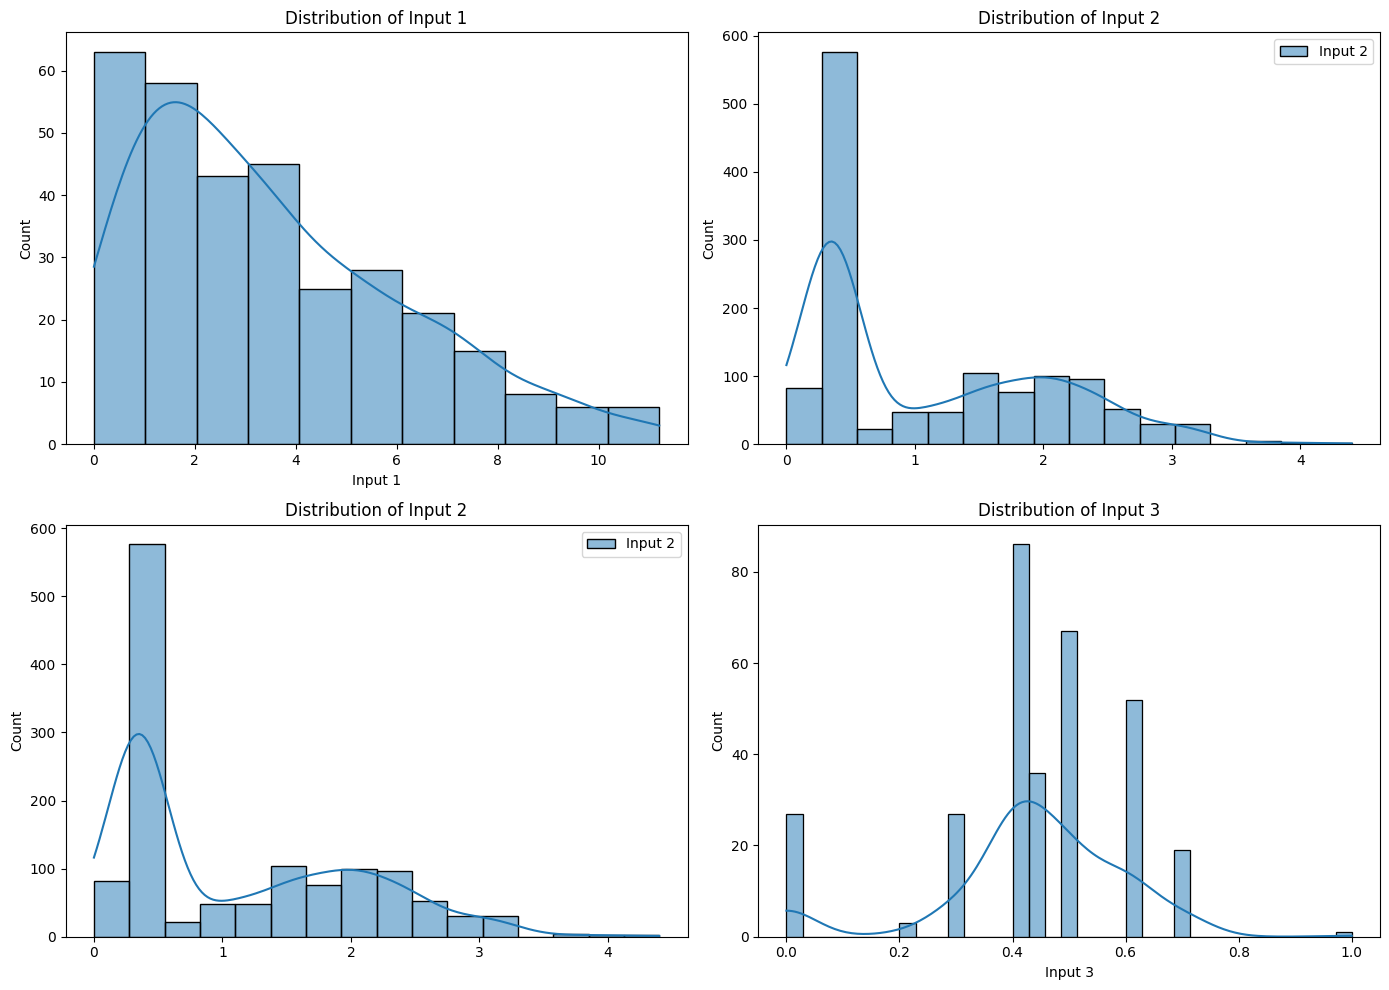

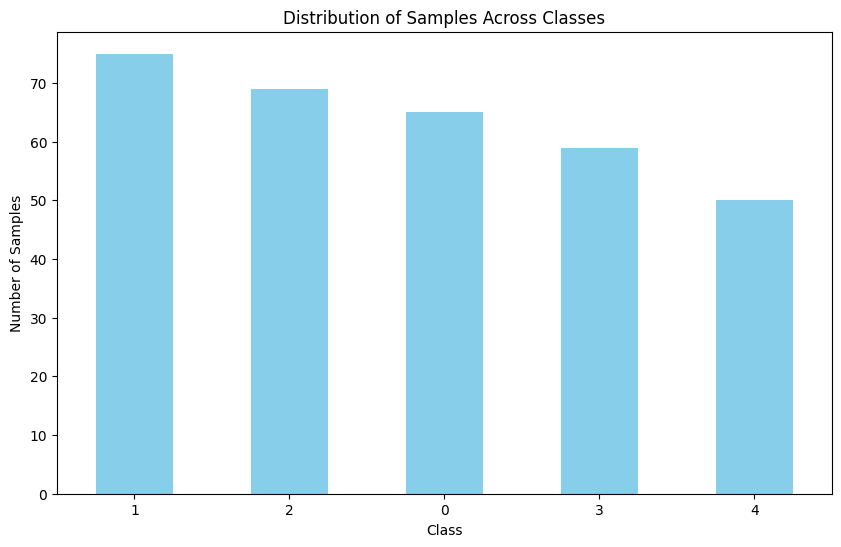

In [11]:
import seaborn as sns

# Plot the distribution of each feature
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(data.columns[:4]):
    sns.histplot(data[col], ax=axs[i//2, i%2], kde=True)
    axs[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Count the number of samples in each class
class_counts = data['Target'].value_counts()

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Classes')
plt.xticks(ticks=range(len(class_counts)), labels=class_counts.index, rotation=0)
plt.show()




# Inference:
Graphical Representation of Data Distribution.


In [5]:
# Define configurations for MLP
configurations = [
    (5,), (10,), (5, 5), (10, 5)
]

# Define activation functions and epochs
activation_functions = ['relu', 'tanh', 'logistic']
epochs_list = [200, 500, 1000]

results = []

# Train and evaluate models with different activation functions
for config in configurations:
    for activation in activation_functions:
        model = MLPClassifier(hidden_layer_sizes=config, activation=activation, solver='adam', max_iter=500)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Configuration': config,
            'Activation': activation,
            'Epochs': 500,
            'Accuracy': report['accuracy'],
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score']
        })


C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set t

# Inference:

This cell trains and evaluates MLP models with various configurations and activation functions, saving the results in a list.

In [6]:
# Train and evaluate models with different numbers of epochs
for config in configurations:
    for epochs in epochs_list:
        model = MLPClassifier(hidden_layer_sizes=config, activation='relu', solver='adam', max_iter=epochs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Configuration': config,
            'Activation': 'relu',
            'Epochs': epochs,
            'Accuracy': report['accuracy'],
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score']
        })


C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_

# Inference:

This cell trains and evaluates MLP models with various epochs and a fixed activation function ('relu'), saving the results.

In [7]:
# Train and evaluate models with different activation functions and numbers of epochs
for config in configurations:
    for activation in activation_functions:
        for epochs in epochs_list:
            model = MLPClassifier(hidden_layer_sizes=config, activation=activation, solver='adam', max_iter=epochs)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            results.append({
                'Configuration': config,
                'Activation': activation,
                'Epochs': epochs,
                'Accuracy': report['accuracy'],
                'Precision': report['weighted avg']['precision'],
                'Recall': report['weighted avg']['recall'],
                'F1-Score': report['weighted avg']['f1-score']
            })


C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_

# Inference:

This cell trains and evaluates MLP models with various configurations, activation functions, and epochs, saving the results.

In [8]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='pretty'))


+----+---------------+------------+--------+---------------------+---------------------+---------------------+---------------------+
|    | Configuration | Activation | Epochs |      Accuracy       |      Precision      |       Recall        |      F1-Score       |
+----+---------------+------------+--------+---------------------+---------------------+---------------------+---------------------+
| 0  |     (5,)      |    relu    |  500   | 0.3958333333333333  | 0.39292821046853305 | 0.3958333333333333  | 0.3705944822721139  |
| 1  |     (5,)      |    tanh    |  500   | 0.3958333333333333  | 0.35991224170054203 | 0.3958333333333333  | 0.34444443380911544 |
| 2  |     (5,)      |  logistic  |  500   |       0.40625       |  0.305950697586727  |       0.40625       | 0.33290424570912375 |
| 3  |     (10,)     |    relu    |  500   |       0.34375       | 0.29501488095238093 |       0.34375       | 0.2756178420735383  |
| 4  |     (10,)     |    tanh    |  500   | 0.3958333333333333  | 0.

# Inference:

This cell converts the results list to a DataFrame and prints it in a pretty format using tabulate.

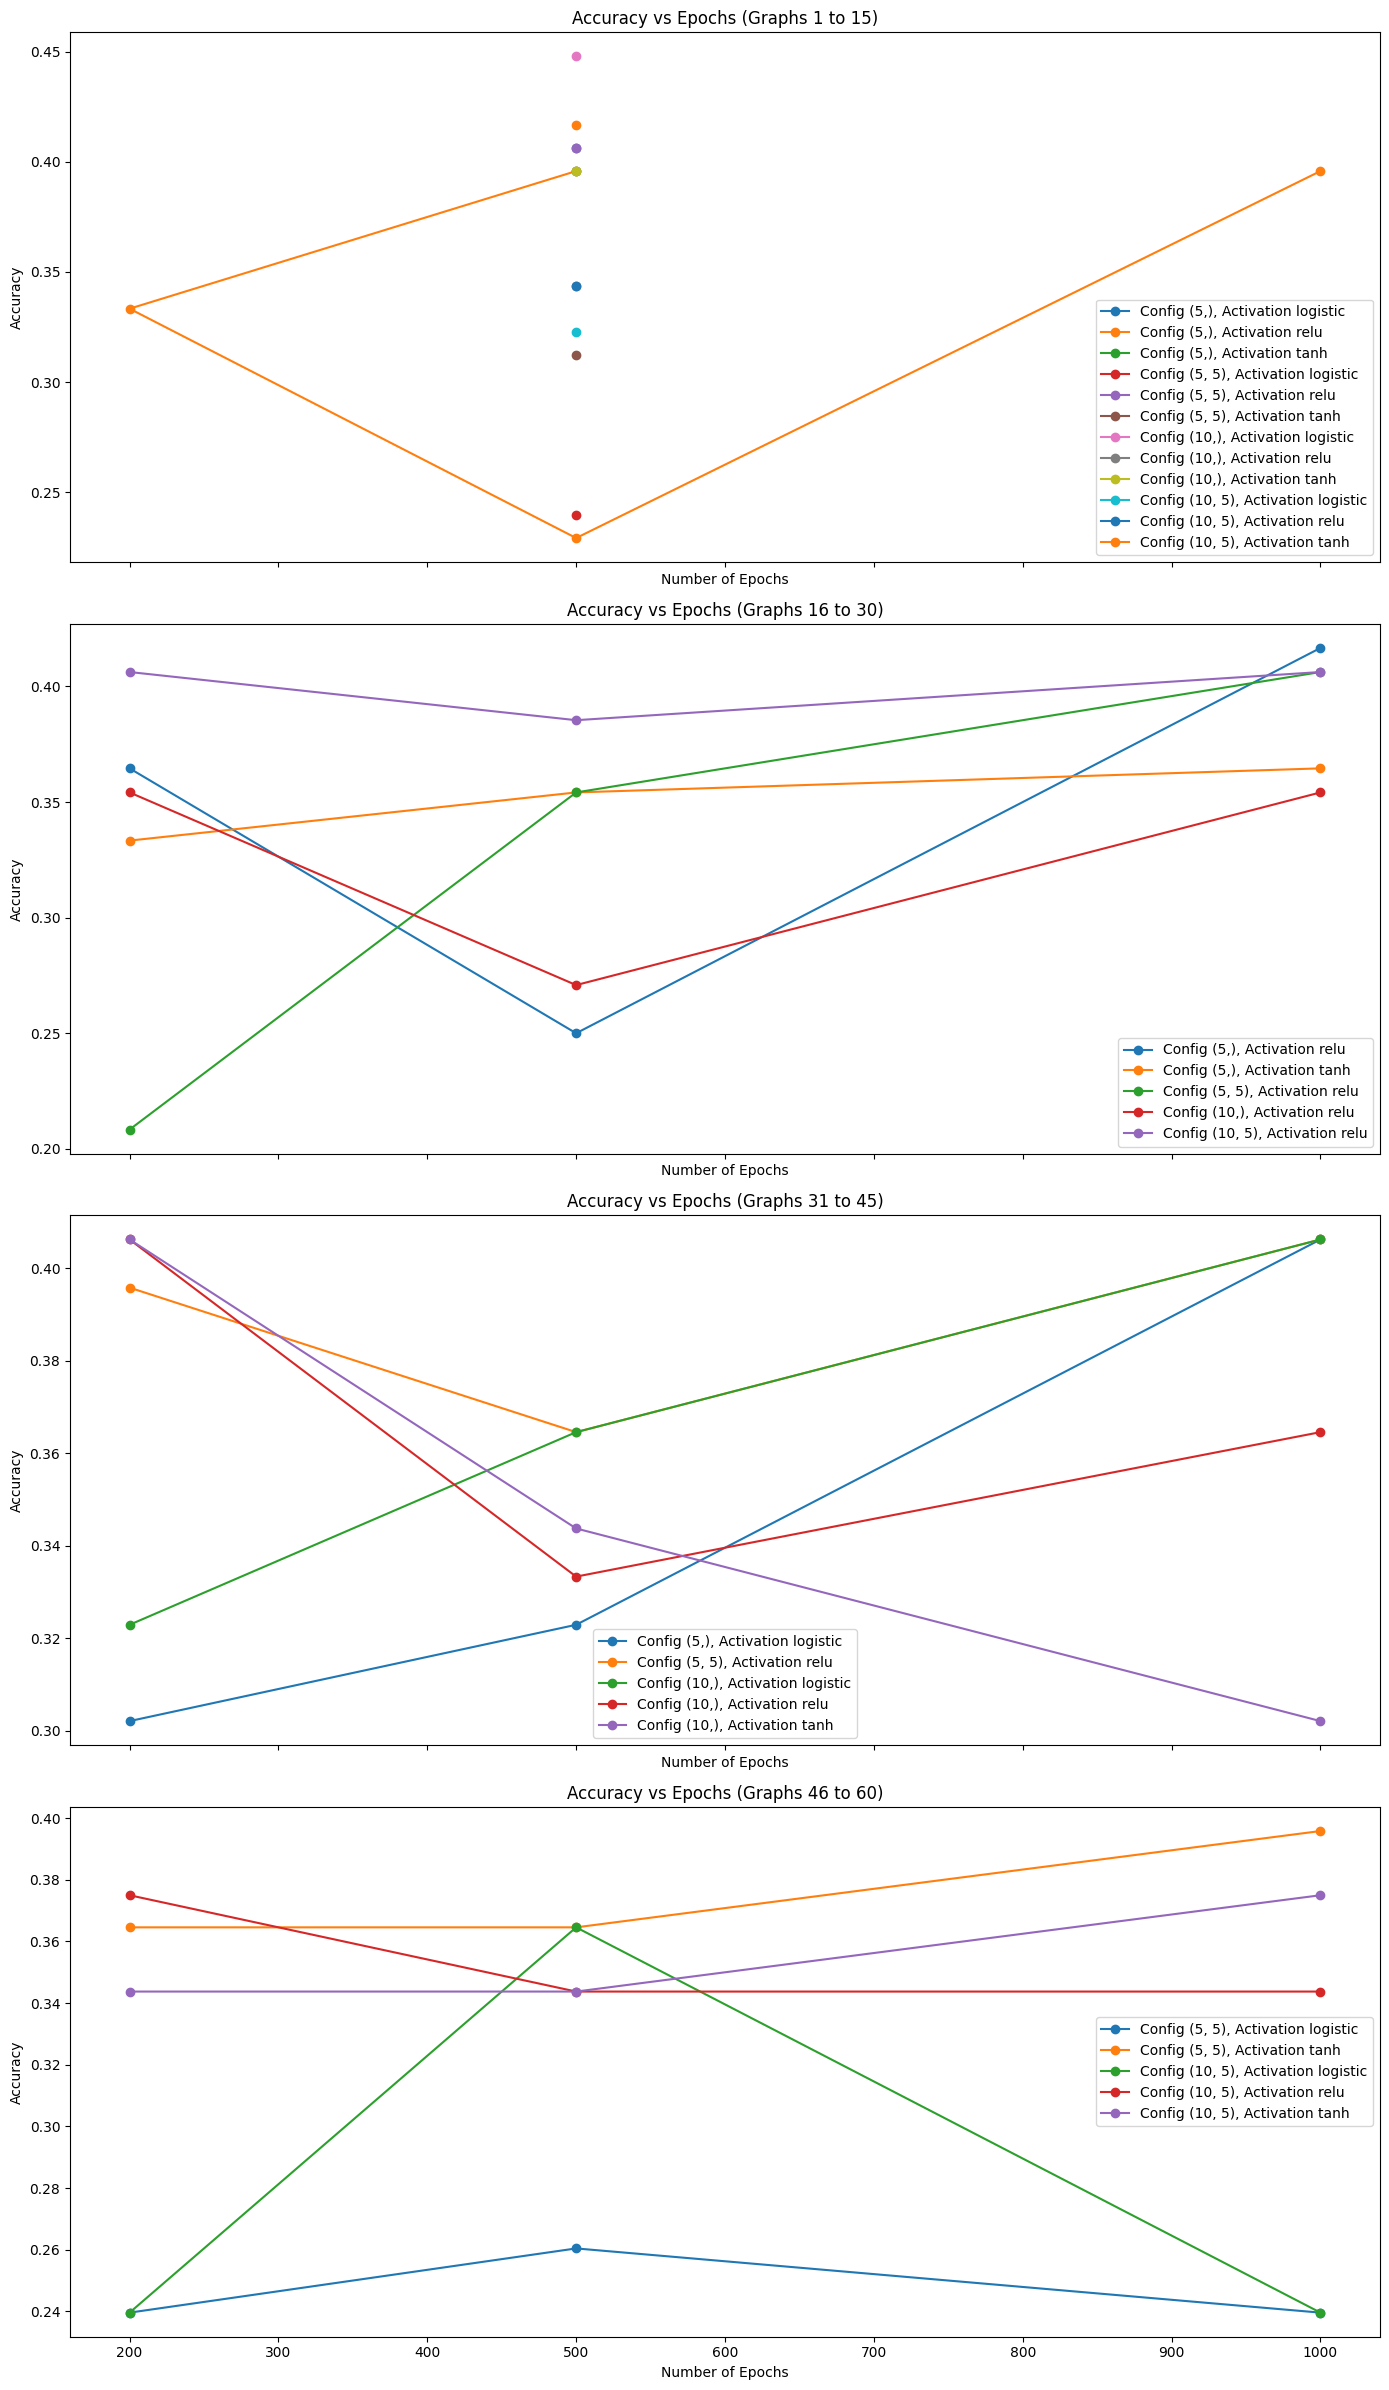

In [9]:
# Plotting the results using matplotlib
fig, axs = plt.subplots(4, 1, figsize=(14, 24), sharex=True)

# Define the number of plots per graph for accuracy vs epochs
num_plots_per_graph = 15
total_plots = len(results_df)

# Accuracy vs Epochs
for i in range(4):
    start_index = i * num_plots_per_graph
    end_index = min(start_index + num_plots_per_graph, total_plots)
    subset = results_df.iloc[start_index:end_index]
    
    for (config, activation), group_df in subset.groupby(['Configuration', 'Activation']):
        axs[i].plot(group_df['Epochs'], group_df['Accuracy'], marker='o', label=f'Config {config}, Activation {activation}')
    
    axs[i].set_title(f'Accuracy vs Epochs (Graphs {i*15 + 1} to {min((i+1)*15, total_plots)})')
    axs[i].set_xlabel('Number of Epochs')
    axs[i].set_ylabel('Accuracy')
    axs[i].legend(loc='best')

plt.tight_layout()
plt.show()


# Inference:

This cell plots Accuracy vs. Number of Epochs for different configurations and activation functions. It uses multiple subplots to handle the large number of configurations.

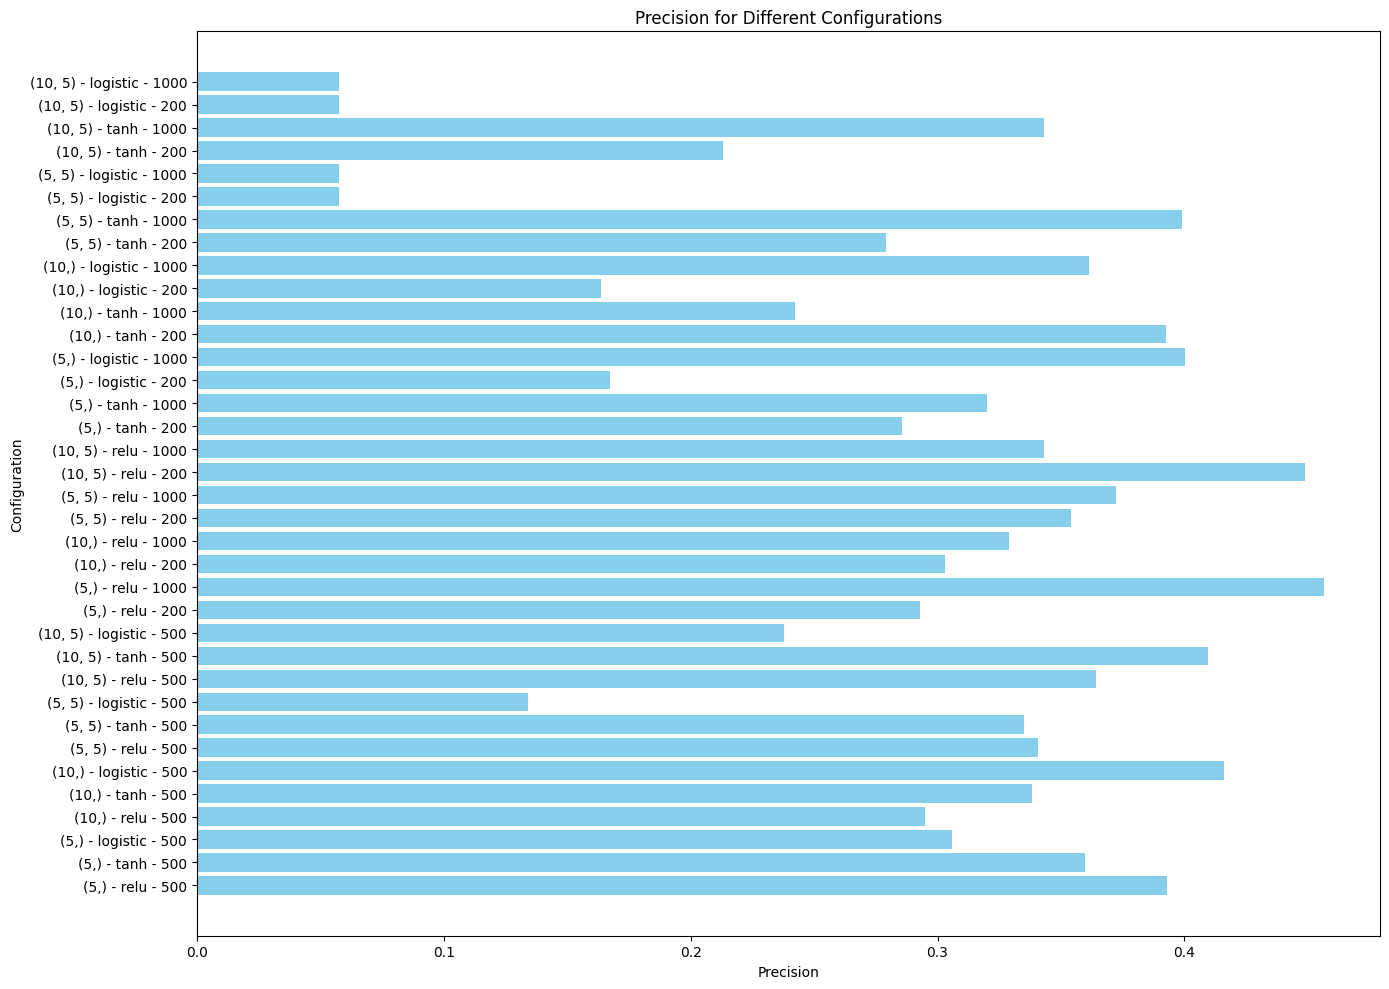

In [10]:
# Plotting Precision for all configurations
fig, ax = plt.subplots(figsize=(14, 10))

# Create a list of configuration labels
config_labels = results_df['Configuration'].astype(str) + ' - ' + results_df['Activation'] + ' - ' + results_df['Epochs'].astype(str)
precisions = results_df['Precision']

# Create the bar plot
ax.barh(config_labels, precisions, color='skyblue')

# Adding labels and title
ax.set_xlabel('Precision')
ax.set_ylabel('Configuration')
ax.set_title('Precision for Different Configurations')

# Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Inference:

This cell generates a horizontal bar plot showing the precision for each configuration. It helps visualize how each model configuration performed in terms of precision.